<a href="https://colab.research.google.com/github/madanjha/PythonDS/blob/main/WindEfficiencyProject15thFeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wind Efficiency Prediction Project**

Dataset link : https://drive.google.com/file/d/1L2j9bL1JvvNqC-X4slQKu4-n4Zk7fAWE/view?usp=sharing

In [ ]:
# Import the necessary lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import os
# from google.colab import drive
# drive.mount('Path')

In [ ]:
df = pd.read_csv('/content/train (1) (1).csv')

In [ ]:
df.head()

,timestamp,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095


* We have to predict the value for monitoring the turbines

In [ ]:
df.columns

Index(['timestamp', 'active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target'],
      dtype='object')

In [ ]:
df.shape

(909604, 16)

In [ ]:
# number of turbines - help you to identify Diff turbines used in my data
df['turbine_id'].unique()

array(['Turbine_108', 'Turbine_18', 'Turbine_105', 'Turbine_15',
       'Turbine_01', 'Turbine_14', 'Turbine_10', 'Turbine_103',
       'Turbine_123', 'Turbine_120', 'Turbine_139', 'Turbine_97',
       'Turbine_19', 'Turbine_20', 'Turbine_13', 'Turbine_158'],
      dtype=object)

In [ ]:
df['turbine_id'].nunique()

16

# EDA

In [ ]:
# Data type of each column

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 16 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   timestamp                               909604 non-null  object 
 1   active_power_calculated_by_converter    909604 non-null  float64
 2   active_power_raw                        909604 non-null  float64
 3   ambient_temperature                     909604 non-null  float64
 4   generator_speed                         909604 non-null  float64
 5   generator_winding_temp_max              909604 non-null  float64
 6   grid_power10min_average                 909604 non-null  float64
 7   nc1_inside_temp                         909604 non-null  float64
 8   nacelle_temp                            909604 non-null  float64
 9   reactice_power_calculated_by_converter  909604 non-null  float64
 10  reactive_power                          9096

In [ ]:
df.drop(columns='timestamp',inplace = True)

In [ ]:
df

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,Turbine_108,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,Turbine_18,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,Turbine_105,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,Turbine_15,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,Turbine_01,54.346095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909599,929.101908,948.441905,32.736076,1187.303192,83.187140,1343.320577,32.291391,35.152280,152.216446,191.088800,189.901812,7.155343,1.028960,Turbine_13,50.768675
909600,100.730526,88.694599,30.540500,770.245593,56.235497,177.620552,30.434302,29.932141,85.353107,96.621675,93.417590,4.121607,0.595874,Turbine_158,44.234821
909601,1120.915965,1165.016907,30.901129,1170.456860,62.942943,873.414622,30.491818,33.085164,42.820210,74.111173,230.988398,8.551669,0.951241,Turbine_15,46.942486
909602,123.444564,116.066919,32.697933,770.190796,57.245207,95.865704,32.338824,31.525384,86.549094,97.470984,65.408801,4.324064,0.247335,Turbine_97,46.392221


In [ ]:
df.isnull().sum()

,0
active_power_calculated_by_converter,0
active_power_raw,0
ambient_temperature,0
generator_speed,0
generator_winding_temp_max,0
grid_power10min_average,0
nc1_inside_temp,0
nacelle_temp,0
reactice_power_calculated_by_converter,0
reactive_power,0


In [ ]:
df.duplicated().sum()

0

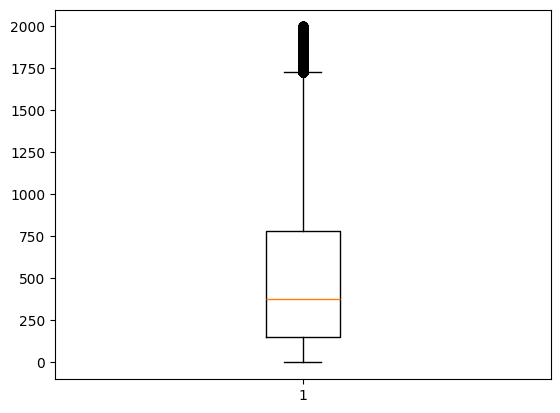

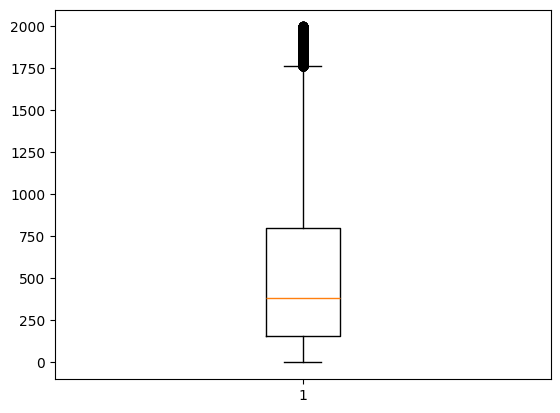

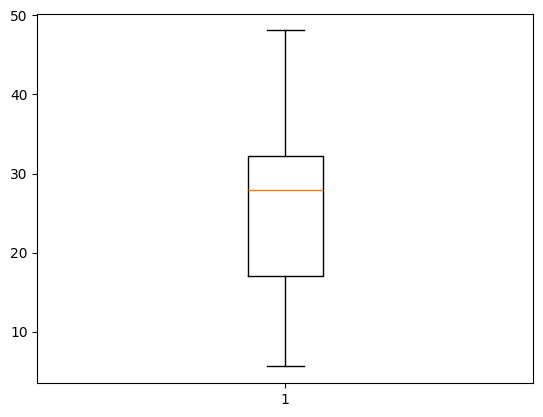

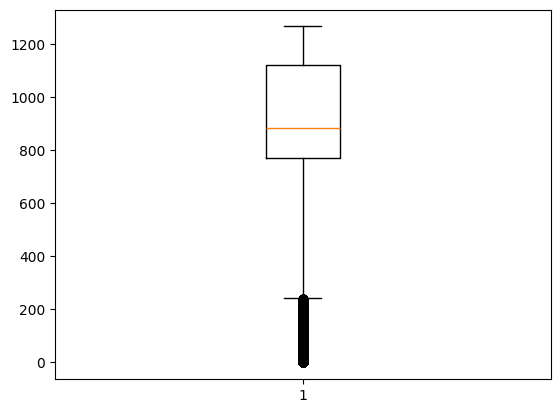

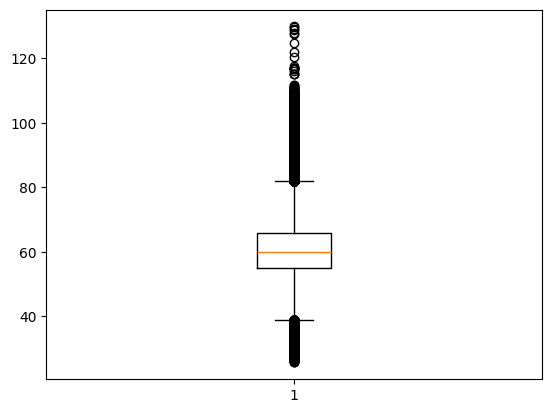

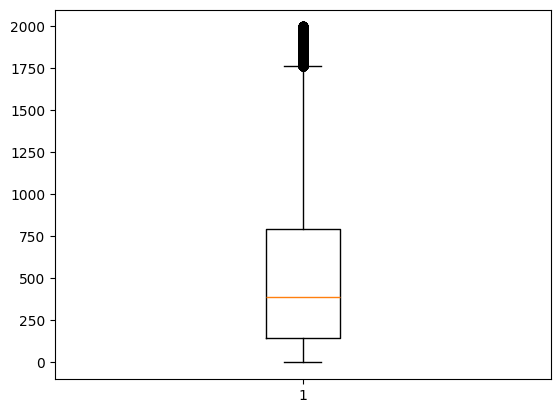

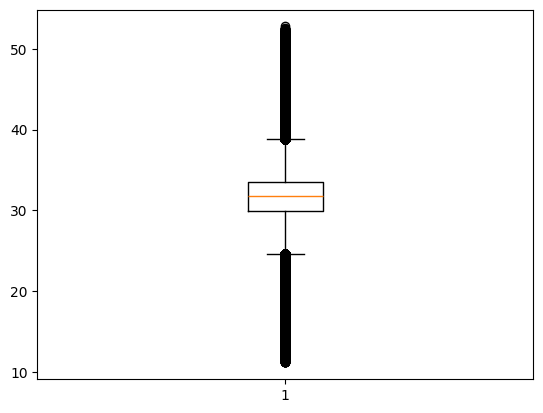

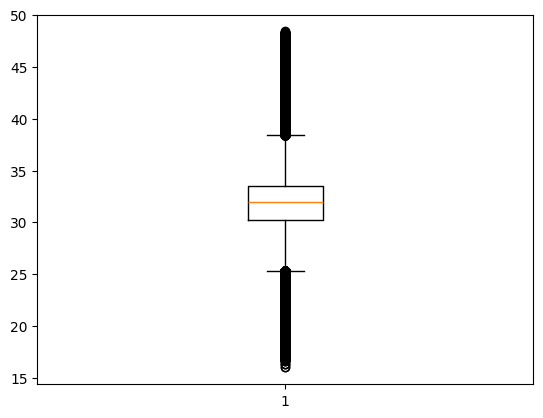

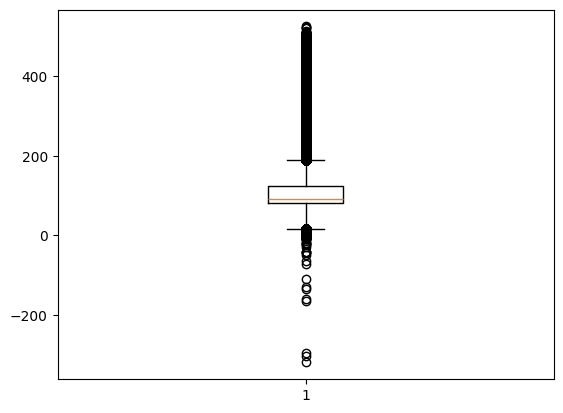

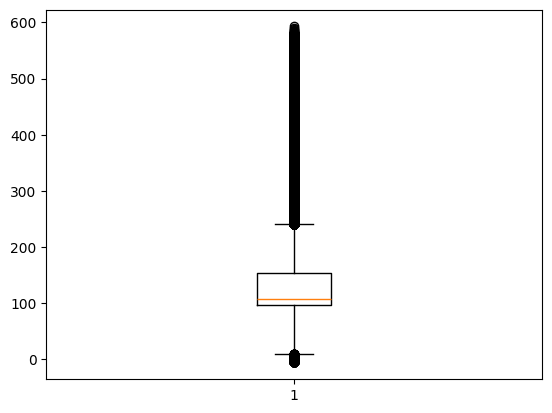

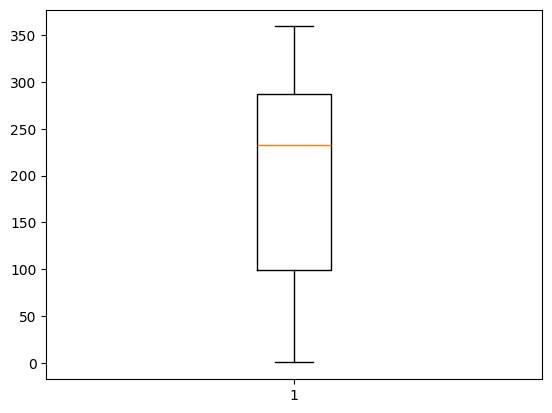

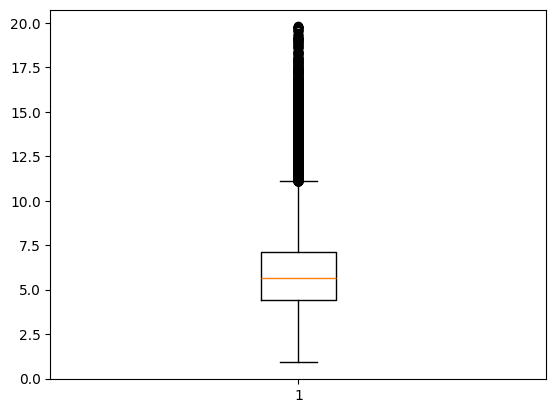

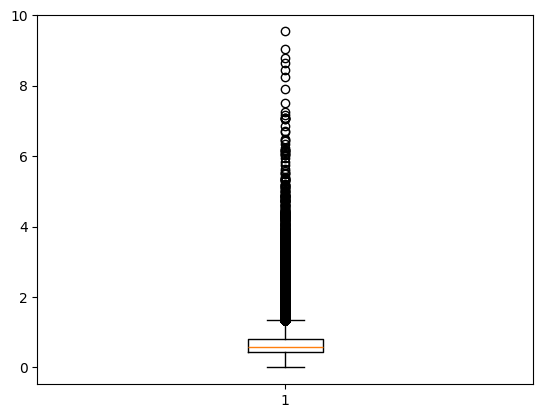

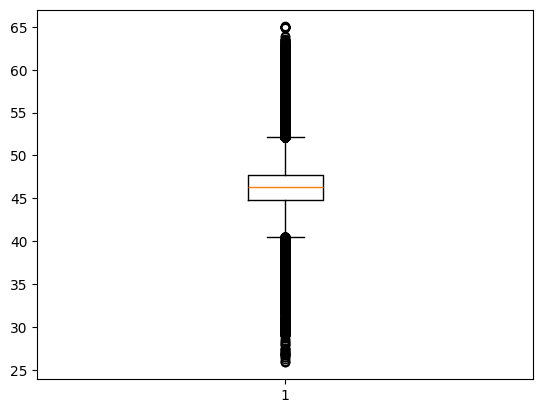

In [ ]:
for col in df.columns:
  if df[col].dtype != 'object':
    plt.boxplot(df[col])
    plt.show()

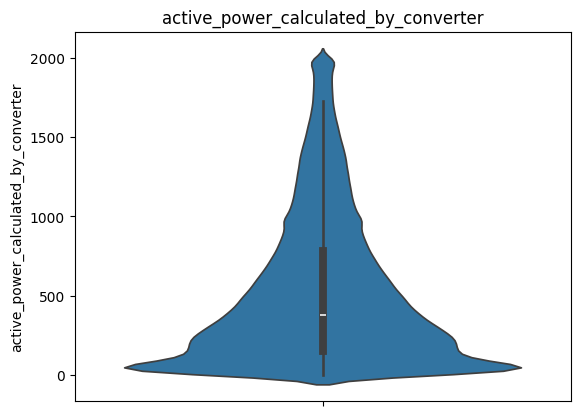

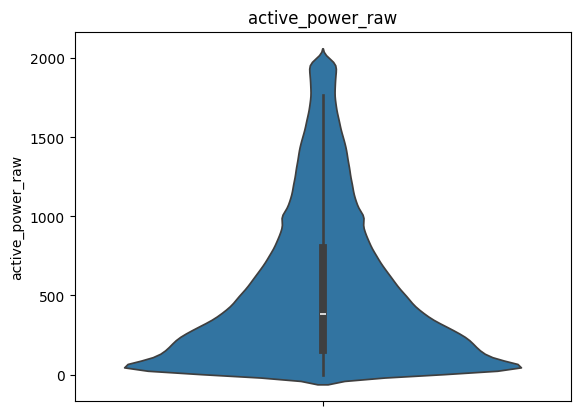

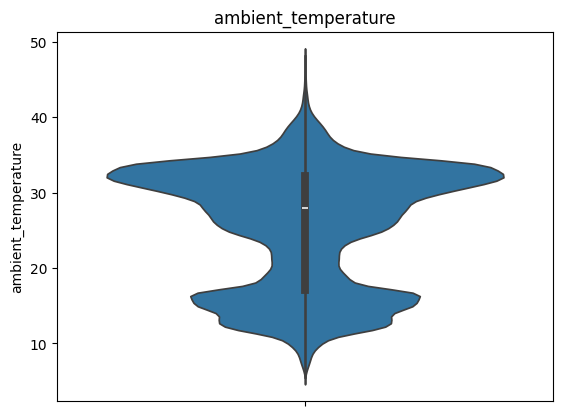

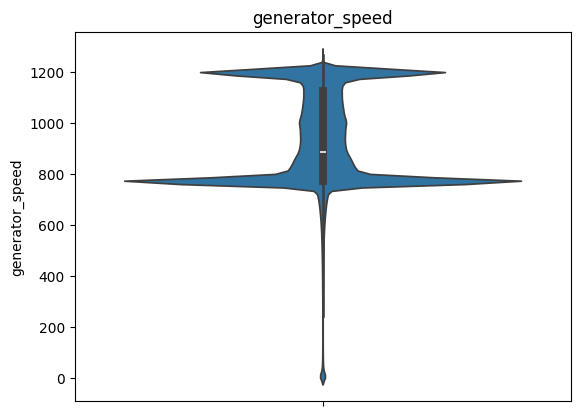

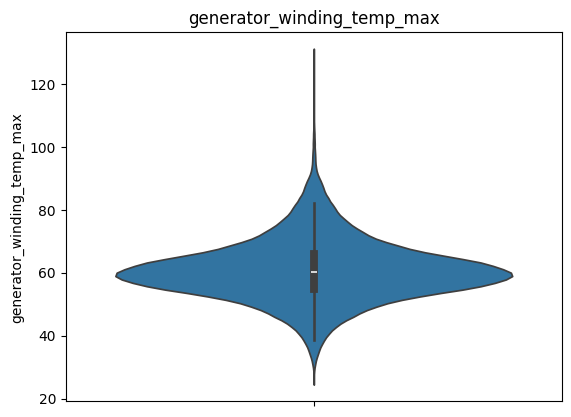

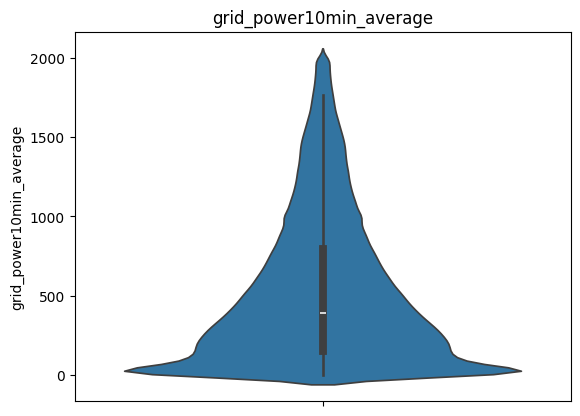

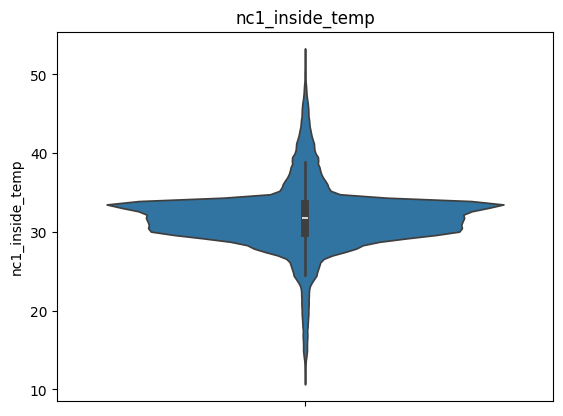

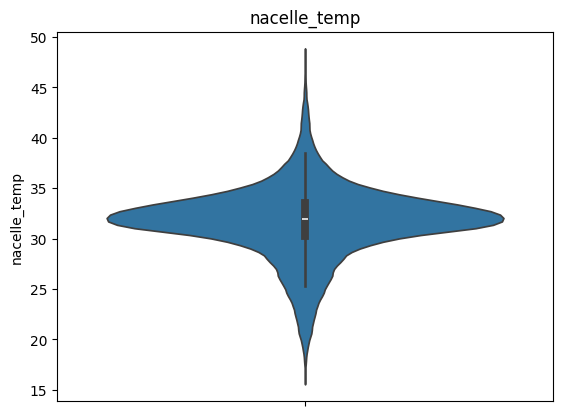

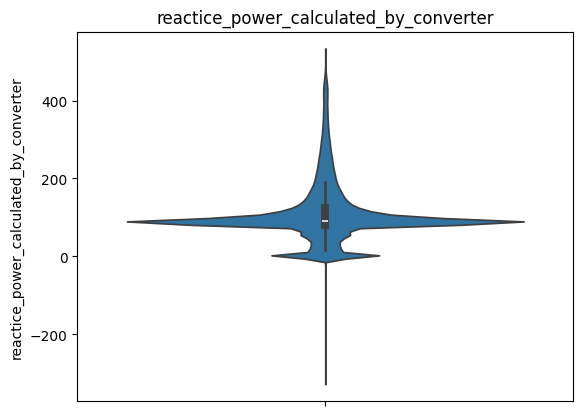

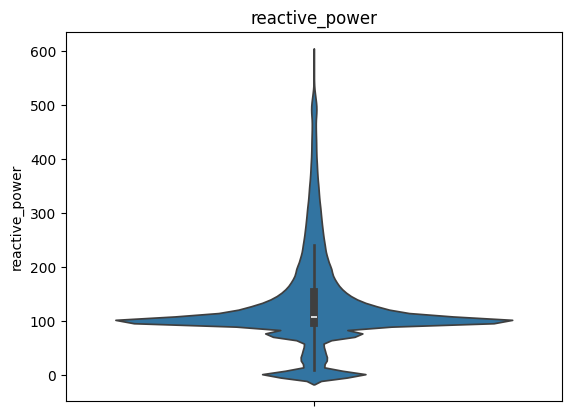

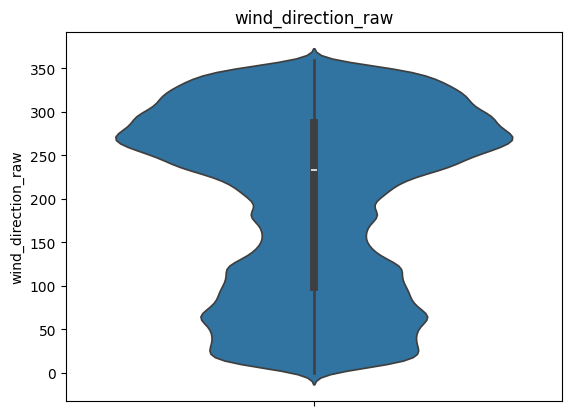

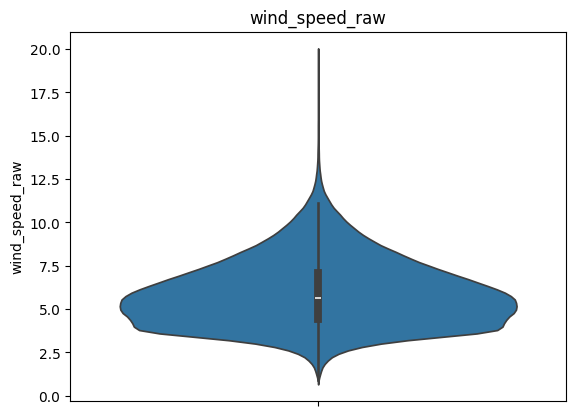

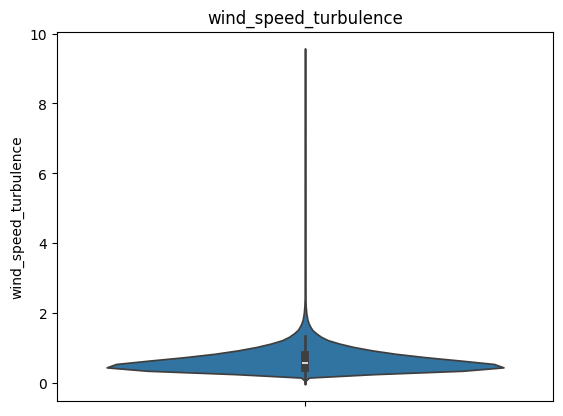

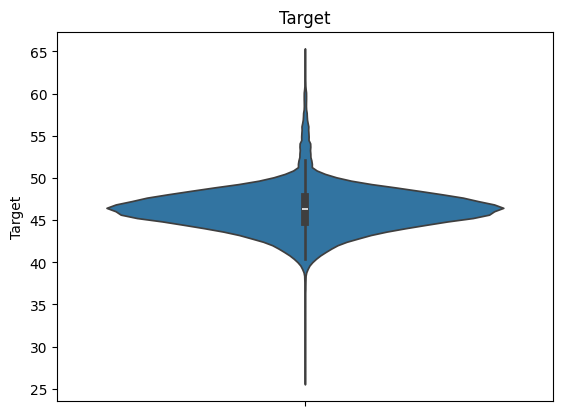

In [ ]:
for col in df.columns:
  if df[col].dtype != 'object':
    sns.violinplot(df[col])
    plt.title(col)
    plt.show()

In [ ]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['turbine_id'] = le.fit_transform(df['turbine_id'])

In [ ]:
df.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,4,47.582787
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,12,46.070328
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,3,39.989236
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,10,46.056587
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,0,54.346095


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909604 entries, 0 to 909603
Data columns (total 15 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   active_power_calculated_by_converter    909604 non-null  float64
 1   active_power_raw                        909604 non-null  float64
 2   ambient_temperature                     909604 non-null  float64
 3   generator_speed                         909604 non-null  float64
 4   generator_winding_temp_max              909604 non-null  float64
 5   grid_power10min_average                 909604 non-null  float64
 6   nc1_inside_temp                         909604 non-null  float64
 7   nacelle_temp                            909604 non-null  float64
 8   reactice_power_calculated_by_converter  909604 non-null  float64
 9   reactive_power                          909604 non-null  float64
 10  wind_direction_raw                      9096

In [ ]:
# We don't have to select all features....
# What we can do

# Feature selection and Feature extraction
## Feature selections
* Correlation
* VIF
* RFE

## Feature Elimination
* PCA
* LDA

In [ ]:
# Let's check correlation
df.corr()


,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id,Target
active_power_calculated_by_converter,1.000000,0.996435,-0.055748,0.865399,0.704785,0.951129,-0.048977,-0.114523,0.859807,0.890428,0.047813,0.933014,0.517178,0.029230,-0.041087
active_power_raw,0.996435,1.000000,-0.053158,0.854905,0.700618,0.950450,-0.048257,-0.112044,0.846891,0.880181,0.047419,0.931078,0.519473,0.028638,-0.040516
ambient_temperature,-0.055748,-0.053158,1.000000,-0.066242,0.090796,-0.062978,0.257850,0.365564,-0.078901,-0.083129,-0.015721,-0.088032,0.049475,0.003482,0.420487
generator_speed,0.865399,0.854905,-0.066242,1.000000,0.578988,0.830755,-0.063460,-0.157969,0.701424,0.726535,0.036872,0.829254,0.404138,0.034490,-0.042414
generator_winding_temp_max,0.704785,0.700618,0.090796,0.578988,1.000000,0.748013,0.056168,0.227567,0.666822,0.683035,0.096984,0.635969,0.452987,0.030526,0.295409
grid_power10min_average,0.951129,0.950450,-0.062978,0.830755,0.748013,1.000000,-0.057500,-0.134016,0.807921,0.840253,0.049098,0.893555,0.496686,0.029251,-0.049738
nc1_inside_temp,-0.048977,-0.048257,0.257850,-0.063460,0.056168,-0.057500,1.000000,0.691790,-0.042599,-0.048746,0.067772,-0.058853,0.069330,0.207090,0.201853
nacelle_temp,-0.114523,-0.112044,0.365564,-0.157969,0.227567,-0.134016,0.691790,1.000000,-0.088603,-0.098586,0.147899,-0.167366,0.164580,0.044271,0.508957
reactice_power_calculated_by_converter,0.859807,0.846891,-0.078901,0.701424,0.666822,0.807921,-0.042599,-0.088603,1.000000,0.993317,0.035202,0.790763,0.442172,-0.007785,-0.033477
reactive_power,0.890428,0.880181,-0.083129,0.726535,0.683035,0.840253,-0.048746,-0.098586,0.993317,1.000000,0.037892,0.827514,0.458801,-0.005434,-0.034994


<Axes: >

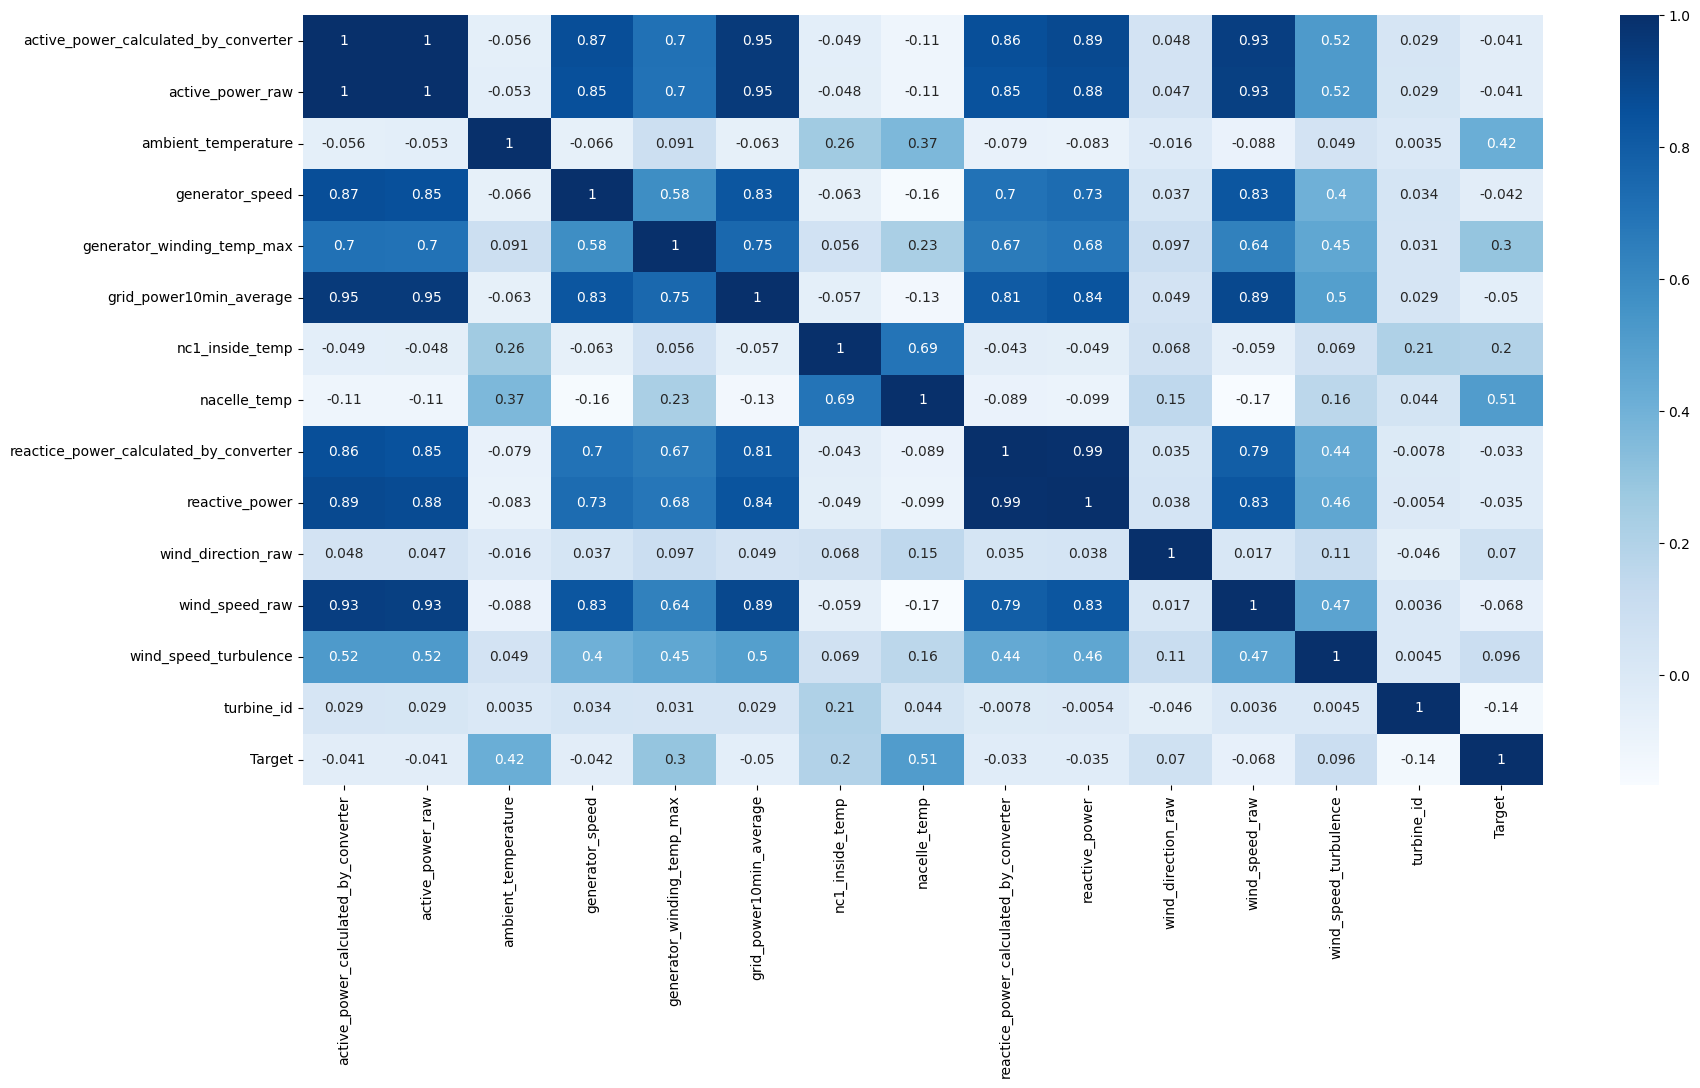

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True,cmap='Blues')

**Note** : Possiblities are that some columns actually create multicolinearity
* Select the important feature apart from choosing through VIF
* Let's do RFE (Recursive Feature Elimination)

In [ ]:
# Let's segregate the data into x and y
X = df.drop(['Target'],axis=1)
y = df['Target']

In [ ]:
X.head()

,active_power_calculated_by_converter,active_power_raw,ambient_temperature,generator_speed,generator_winding_temp_max,grid_power10min_average,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,reactive_power,wind_direction_raw,wind_speed_raw,wind_speed_turbulence,turbine_id
0,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,165.501518,280.864782,7.057000,0.544082,4
1,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,113.835236,299.552460,5.474937,0.469031,12
2,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,281.452253,84.960106,8.092457,0.622318,3
3,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,75.017531,87.261119,4.071032,0.760719,10
4,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,160.202421,313.724818,6.357943,0.346068,0


In [ ]:
y.head()

,Target
0,47.582787
1,46.070328
2,39.989236
3,46.056587
4,54.346095


In [ ]:
X.shape,y.shape

((909604, 14), (909604,))

# Different models have different ranking feature importance
* DT/RF : It will rank the feature based on how well the data is splited
* LR: Cofficient value that tells which columns are important
* SVM : Weights from your support vectors can be used to get important colmns

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
lr = LinearRegression() # This model will help me to find which feature to select (Not to predict the target)
rfe = RFE(lr,n_features_to_select=8)
rfe.fit(X,y)

RFE(estimator=LinearRegression(), n_features_to_select=8)

* rfe.ranking_ : To get the rank of all features based on their importance (if there is 1 means important)
* rfe.get_support() : It gives a boolean value which colm is selected
* rfe.get_feature_names_out() : It gives name of the important features

In [ ]:
rfe.ranking_

array([5, 6, 1, 4, 1, 3, 1, 1, 1, 2, 7, 1, 1, 1])

In [ ]:
rfe.get_support()

array([False, False,  True, False,  True, False,  True,  True,  True,
       False, False,  True,  True,  True])

In [ ]:
X.columns

Index(['active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id'],
      dtype='object')

In [ ]:
rfe.get_feature_names_out()


array(['ambient_temperature', 'generator_winding_temp_max',
       'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'wind_speed_raw',
       'wind_speed_turbulence', 'turbine_id'], dtype=object)

In [ ]:
X = X[rfe.get_feature_names_out()]

In [ ]:
X

,ambient_temperature,generator_winding_temp_max,nc1_inside_temp,nacelle_temp,reactice_power_calculated_by_converter,wind_speed_raw,wind_speed_turbulence,turbine_id
0,31.694380,65.954214,31.881972,31.504713,141.457644,7.057000,0.544082,4
1,12.894948,59.571319,32.423705,32.755770,89.186457,5.474937,0.469031,12
2,16.648388,61.270498,11.446849,18.332985,230.622309,8.092457,0.622318,3
3,28.388141,40.674348,34.253204,32.662889,66.211015,4.071032,0.760719,10
4,31.519527,64.341763,32.405586,31.466387,137.163938,6.357943,0.346068,0
...,...,...,...,...,...,...,...,...
909599,32.736076,83.187140,32.291391,35.152280,152.216446,7.155343,1.028960,7
909600,30.540500,56.235497,30.434302,29.932141,85.353107,4.121607,0.595874,11
909601,30.901129,62.942943,30.491818,33.085164,42.820210,8.551669,0.951241,10
909602,32.697933,57.245207,32.338824,31.525384,86.549094,4.324064,0.247335,15


In [ ]:
# Data can be standardize for better performance of model
# Hyper parameters? {Parameters that we use for DT?} - you need to do

In [ ]:
# let's implement the model after the break
# Spliting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr_pred = lr.predict(X_test)

In [ ]:
y_test

,Target
426694,48.591511
905999,48.263920
771887,43.726114
46228,43.581381
415224,52.543697
...,...
651822,46.780514
854085,50.099350
286421,45.009113
149029,45.122433


In [ ]:
lr_pred

array([46.81447444, 46.74826109, 44.9358814 , ..., 45.90403013,
       45.71551864, 44.956681  ])

In [ ]:
from sklearn.metrics import *

In [ ]:
r2_score(y_test,lr_pred) # 42% r2

0.42452618598943725

# Decision Tree

In [ ]:
X = df.drop(['Target'],axis = 1) # independent
y = df['Target'] # dependt

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor() # This model will help me to find which feature to select (Not to predict the target)
rfe = RFE(dt,n_features_to_select=8)
rfe.fit(X,y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=8)

In [ ]:
rfe.ranking_

array([3, 7, 1, 6, 1, 1, 1, 1, 1, 5, 1, 4, 2, 1])

In [ ]:
rfe.get_support()

array([False, False,  True, False,  True,  True,  True,  True,  True,
       False,  True, False, False,  True])

In [ ]:
X = X[rfe.get_feature_names_out()]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
dt_pred = dt.predict(X_test)

In [ ]:
r2_score(y_test,dt_pred)

0.6397182265019726

* r2_score for DT : 0.6397182265019726

# Random Forest



In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
rf_pred = rf.predict(X_test)
rf_pred

array([47.88272826, 48.58556063, 43.5918387 , ..., 45.31973812,
       45.14080054, 48.40035867])

In [ ]:
r2_score(y_test,rf_pred)

0.8255876927106575

In [ ]:
# Remove outlier - try to implement
# Standardization -
# PCA - Feature extarction
# then go for randomforest
# Hyper parameter tuning